In [1]:
import pandas as pd
listings_df = pd.read_csv('data/listings.csv')

C:\Users\ralma\AppData\Local\Temp\ipykernel_1676\1663496370.py:2: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv('data/listings.csv')


In [2]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36720,https://www.airbnb.com/rooms/36720,20191125094942,2019-11-25,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt....","2-Zimmer Altbauwohung Beste Lage, zentral, im ...","Very quiet, yet centrally located 2 rooms apt....",none,Glockenbachviertel area has the hippest restau...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.37
1,97945,https://www.airbnb.com/rooms/97945,20191125094942,2019-11-25,Deluxw-Apartm. with roof terrace,NaN,"We offer a modern, quiet apartment with a sunn...","We offer a modern, quiet apartment with a sunn...",none,We are living in a outskirt of Munich its call...,...,f,f,flexible,f,f,1,1,0,0,1.32
2,114695,https://www.airbnb.com/rooms/114695,20191125094942,2019-11-25,Apartment Munich/East with sundeck,NaN,It´s a quiet and sunny apartment close to the ...,It´s a quiet and sunny apartment close to the ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.52
3,127383,https://www.airbnb.com/rooms/127383,20191125094942,2019-11-25,City apartment next to Pinakothek,Die Wohnung hat 55 qm und ist voll ausgestatte...,My cosy apartment is located in the heart of M...,My cosy apartment is located in the heart of M...,none,NaN,...,f,f,flexible,t,f,2,1,1,0,0.79
4,157808,https://www.airbnb.com/rooms/157808,20191125094942,2019-11-25,"Near Olympia,English Garden",Kleines gemütliches Privat Zimmer mit Kabel TV...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,none,"In der Nähe befinden sich einige Kaffees,Kneip...",...,f,f,moderate,f,f,1,0,1,0,NaN


In [3]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 9.3+ MB


In [4]:
# Create a list of the features we plan to keep
key_features = [
    'price', 'room_type', 'property_type', 'accommodates', 'beds', 'bathrooms',
    'cleaning_fee', 'security_deposit', 'minimum_nights', 'neighbourhood_cleansed',
    'latitude', 'longitude', 'host_since', 'host_is_superhost', 'host_listings_count',
    'number_of_reviews', 'review_scores_rating', 'availability_365', 'cancellation_policy',
    'amenities' # Keeping this for feature engineering later
]

# Create a new DataFrame with only these columns
price_df = listings_df[key_features]

In [7]:
print(price_df['price'].dtype)
price_df['price'].head(10)

object


0     $95.00
1     $80.00
2     $95.00
3    $120.00
4     $35.00
5     $55.00
6     $55.00
7     $65.00
8     $55.00
9     $54.00
Name: price, dtype: object

In [9]:
# Assuming you have loaded listings_df and selected the columns into price_df.
# If you are continuing directly from the error, you might need to redefine price_df
# to ensure you're working with the fresh, selected subset.

# 1. Select the price column
price_series = price_df['price']

# 2. Remove the dollar sign '$' AND the thousands separator comma ','
# We chain the string replacements
price_series = price_series.str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 3. Convert the cleaned string column to a float
price_df['price'] = pd.to_numeric(price_series)

# 4. Check the result: data type and basic statistics
print(price_df['price'].dtype)
print(price_df['price'].describe())

float64
count    11481.000000
mean       116.336469
std        168.078321
min          8.000000
25%         55.000000
50%         82.000000
75%        130.000000
max       9000.000000
Name: price, dtype: float64


C:\Users\ralma\AppData\Local\Temp\ipykernel_1676\1880146806.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['price'] = pd.to_numeric(price_series)


In [10]:
# 1. Check the number of listings above €500
outliers_500 = price_df[price_df['price'] > 500]['price'].count()

# 2. Check the number of listings above €1000
outliers_1000 = price_df[price_df['price'] > 1000]['price'].count()

# 3. Print the counts
print(f"Listings above €500: {outliers_500}")
print(f"Listings above €1000: {outliers_1000}")

Listings above €500: 144
Listings above €1000: 19


In [11]:
# Define the lower and upper bounds for cleaning
price_lower_bound = 10.0  # Listings below €10 are likely errors
price_upper_bound = 500.0 # Listings above €500 are considered extreme outliers

# Filter the DataFrame to keep only valid prices
price_df = price_df[
    (price_df['price'] >= price_lower_bound) &
    (price_df['price'] <= price_upper_bound)
].copy() # Using .copy() to prevent the SettingWithCopyWarning

# Check the new size of the DataFrame
print(f"New DataFrame size (listings): {len(price_df)}")

# Re-check the descriptive statistics of the cleaned price column
print("\nNew Price Statistics:")
print(price_df['price'].describe())

New DataFrame size (listings): 11335

New Price Statistics:
count    11335.000000
mean       105.462550
std         77.958538
min         10.000000
25%         55.000000
50%         80.000000
75%        128.000000
max        500.000000
Name: price, dtype: float64


In [12]:
# 1. Check data types and head for cleaning_fee
print("--- Cleaning Fee ---")
print(price_df['cleaning_fee'].dtype)
print(price_df['cleaning_fee'].head())

# 2. Check data types and head for security_deposit
print("\n--- Security Deposit ---")
print(price_df['security_deposit'].dtype)
print(price_df['security_deposit'].head())

--- Cleaning Fee ---
object
0    $30.00
1    $10.00
2    $60.00
3    $28.00
4    $10.00
Name: cleaning_fee, dtype: object

--- Security Deposit ---
object
0    $100.00
1        NaN
2    $500.00
3        NaN
4    $100.00
Name: security_deposit, dtype: object


In [13]:
# 1. Remove '$' and ',' from cleaning_fee
fee_series = price_df['cleaning_fee'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 2. Convert to numeric (This will convert NaN strings/nulls to actual NaN float values)
price_df['cleaning_fee'] = pd.to_numeric(fee_series)

# 3. Handle Missing Values: Impute 'NaN' with 0.0, assuming a missing fee means no fee.
# We will check the count of missing values first to decide the best imputation.
missing_fee_count = price_df['cleaning_fee'].isnull().sum()
print(f"Missing Cleaning Fee count BEFORE imputation: {missing_fee_count}")

# 4. Impute (assuming the count is small or zero means no fee)
price_df['cleaning_fee'] = price_df['cleaning_fee'].fillna(0.0)

# 5. Check the result
print(f"Cleaning Fee dtype: {price_df['cleaning_fee'].dtype}")

Missing Cleaning Fee count BEFORE imputation: 3510
Cleaning Fee dtype: float64


In [14]:
# 1. Remove '$' and ',' from security_deposit
deposit_series = price_df['security_deposit'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 2. Convert to numeric
price_df['security_deposit'] = pd.to_numeric(deposit_series)

# 3. Check Missing Values count
missing_deposit_count = price_df['security_deposit'].isnull().sum()
print(f"Missing Security Deposit count BEFORE imputation: {missing_deposit_count}")

# 4. Impute: Replace NaN with 0.0 (assuming missing deposit means no deposit required)
price_df['security_deposit'] = price_df['security_deposit'].fillna(0.0)

# 5. Check the result
print(f"Security Deposit dtype: {price_df['security_deposit'].dtype}")

Missing Security Deposit count BEFORE imputation: 4218
Security Deposit dtype: float64


In [16]:
print(price_df.columns.tolist())

['price', 'room_type', 'property_type', 'accommodates', 'beds', 'bathrooms', 'cleaning_fee', 'security_deposit', 'minimum_nights', 'neighbourhood_cleansed', 'latitude', 'longitude', 'host_since', 'host_is_superhost', 'host_listings_count', 'number_of_reviews', 'review_scores_rating', 'availability_365', 'cancellation_policy', 'amenities']


In [17]:
# Updated list of key numerical columns present in price_df to check for NaNs
numerical_cols_to_check = [
    'accommodates',
    'beds',
    'bathrooms',
    'minimum_nights',
    'host_listings_count',
    'number_of_reviews',
    'review_scores_rating'
]

# Calculate the sum of missing (NaN) values for these columns
missing_counts = price_df[numerical_cols_to_check].isnull().sum()

print("Missing value counts for key numerical features:")
print(missing_counts)

Missing value counts for key numerical features:
accommodates               0
beds                      18
bathrooms                 21
minimum_nights             0
host_listings_count       23
number_of_reviews          0
review_scores_rating    2671
dtype: int64


In [18]:
# Calculate the median for the required columns (excluding the target 'price')
median_beds = price_df['beds'].median()
median_bathrooms = price_df['bathrooms'].median()
median_host_listings = price_df['host_listings_count'].median()
median_review_score = price_df['review_scores_rating'].median()

# Impute the missing values using the calculated medians
price_df['beds'] = price_df['beds'].fillna(median_beds)
price_df['bathrooms'] = price_df['bathrooms'].fillna(median_bathrooms)
price_df['host_listings_count'] = price_df['host_listings_count'].fillna(median_host_listings)
price_df['review_scores_rating'] = price_df['review_scores_rating'].fillna(median_review_score)

# Final check for missing values in the imputed columns
missing_counts_after_imputation = price_df[
    ['beds', 'bathrooms', 'host_listings_count', 'review_scores_rating']
].isnull().sum()

print("Missing value counts AFTER imputation:")
print(missing_counts_after_imputation)

Missing value counts AFTER imputation:
beds                    0
bathrooms               0
host_listings_count     0
review_scores_rating    0
dtype: int64


In [19]:
# 1. Convert 'host_since' to datetime objects
price_df['host_since'] = pd.to_datetime(price_df['host_since'])

# 2. Define the scrape date for calculation (end of data collection)
scrape_date = pd.to_datetime('2019-11-25')

# 3. Calculate Host Tenure in Days
price_df['host_tenure_days'] = (scrape_date - price_df['host_since']).dt.days

# 4. Check for missing values in 'host_tenure_days'
missing_tenure = price_df['host_tenure_days'].isnull().sum()
print(f"Missing Host Tenure (NaN) count: {missing_tenure}")

# 5. Show the head of the new column
print("\nHost Tenure Head:")
print(price_df['host_tenure_days'].head())

Missing Host Tenure (NaN) count: 23

Host Tenure Head:
0    3430.0
1    3143.0
2       NaN
3    3105.0
4    3071.0
Name: host_tenure_days, dtype: float64


In [20]:
# 1. Impute the NaN values in 'host_tenure_days' with 0.0
price_df['host_tenure_days'] = price_df['host_tenure_days'].fillna(0.0)

# 2. Check the missing count again
missing_tenure_after = price_df['host_tenure_days'].isnull().sum()
print(f"Missing Host Tenure (NaN) count AFTER imputation: {missing_tenure_after}")

Missing Host Tenure (NaN) count AFTER imputation: 0


In [21]:
# 1. Count the number of amenities by splitting the string (removing { and } first)
# The strip() removes the braces and split(',') counts the items.
price_df['amenities_count'] = price_df['amenities'].str.strip('{}').str.split(',').apply(len)

# 2. Handle cases where the amenity list is empty/missing
# If the original string was '{}' or null, it might be counted as 1 (empty string).
# We check if the original string was simply '{}' and set the count to 0 in that case.
price_df.loc[price_df['amenities'] == '{}', 'amenities_count'] = 0

# 3. Check for missing values in 'amenities_count' (should be 0 since we imputed host tenure)
missing_amenities_count = price_df['amenities_count'].isnull().sum()
print(f"Missing Amenities Count (NaN) count: {missing_amenities_count}")

# 4. Show the descriptive statistics for the new feature
print("\nAmenities Count Statistics:")
print(price_df['amenities_count'].describe())

Missing Amenities Count (NaN) count: 0

Amenities Count Statistics:
count    11335.000000
mean        17.929775
std          9.647758
min          0.000000
25%         11.000000
50%         15.000000
75%         23.000000
max         73.000000
Name: amenities_count, dtype: float64


In [22]:
# List of key categorical columns to check for NaNs
categorical_cols_to_check = [
    'room_type',
    'property_type',
    'neighbourhood_cleansed',
    'cancellation_policy',
    'host_is_superhost'
]

# Calculate the sum of missing (NaN) values for these columns
categorical_missing_counts = price_df[categorical_cols_to_check].isnull().sum()

print("Missing value counts for key categorical features:")
print(categorical_missing_counts)

Missing value counts for key categorical features:
room_type                  0
property_type              0
neighbourhood_cleansed     0
cancellation_policy        0
host_is_superhost         23
dtype: int64


In [23]:
# 1. Impute missing values with the mode ('f' is highly likely the mode)
mode_superhost = price_df['host_is_superhost'].mode()[0]
price_df['host_is_superhost'] = price_df['host_is_superhost'].fillna(mode_superhost)

# 2. Convert 't'/'f' to 1/0 (Binary Encoding)
price_df['is_superhost'] = price_df['host_is_superhost'].map({'t': 1, 'f': 0})

# 3. Drop the original column
price_df = price_df.drop('host_is_superhost', axis=1)

# 4. Check the results (new column stats)
print("New 'is_superhost' (0/1) value counts:")
print(price_df['is_superhost'].value_counts())

New 'is_superhost' (0/1) value counts:
is_superhost
0    9894
1    1441
Name: count, dtype: int64


In [24]:
# List of columns for One-Hot Encoding
ohe_cols = [
    'room_type',
    'property_type',
    'neighbourhood_cleansed',
    'cancellation_policy'
]

# Check the number of unique values (cardinality) for each
cardinality = price_df[ohe_cols].nunique()

print("\nCardinality of Categorical Features:")
print(cardinality)


Cardinality of Categorical Features:
room_type                  4
property_type             29
neighbourhood_cleansed    25
cancellation_policy        5
dtype: int64


In [25]:
# List of columns for One-Hot Encoding
ohe_cols = [
    'room_type',
    'property_type',
    'neighbourhood_cleansed',
    'cancellation_policy'
]

# Apply One-Hot Encoding with drop_first=True
price_df = pd.get_dummies(price_df, columns=ohe_cols, drop_first=True)

# Check the new number of columns in the DataFrame
print(f"Total columns after OHE: {len(price_df.columns)}")

# Show the first few new column names to confirm the encoding
new_ohe_columns = [col for col in price_df.columns if any(c in col for c in ohe_cols)]
print("\nSample of New OHE Columns:")
print(new_ohe_columns[:10]) # Displaying the first 10 for a quick check

Total columns after OHE: 77

Sample of New OHE Columns:
['room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'property_type_Apartment', 'property_type_Bed and breakfast', 'property_type_Boat', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Bus', 'property_type_Cabin']


In [26]:
# The target variable (y) is 'price'
y = price_df['price']

# The feature matrix (X) is the rest of the DataFrame
# We drop all original text/date columns (host_since, amenities) and the target
columns_to_drop = [
    'price',         # Target
    'host_since',    # Used to create host_tenure_days
    'amenities'      # Used to create amenities_count
]
X = price_df.drop(columns=columns_to_drop, axis=1)

# Check the shapes to confirm
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Features (X) shape: (11335, 74)
Target (y) shape: (11335,)


In [27]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the sizes of the split sets
print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")


Training set size: 9068 samples
Testing set size: 2267 samples


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Initialize and Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# 2. Make predictions
y_pred_lr = lr.predict(X_test)

# 3. Calculate metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("--- Linear Regression Results ---")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R2 Score: {r2_lr:.4f}")

--- Linear Regression Results ---
MAE: 48.96
RMSE: 70.80
R2 Score: 0.2339


In [29]:
from sklearn.linear_model import Ridge, Lasso

# 1. Initialize and Train Ridge Regression
ridge = Ridge(alpha=1.0) # Default alpha (regularization strength)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# 2. Initialize and Train Lasso Regression
lasso = Lasso(alpha=1.0) # Default alpha
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# 3. Calculate metrics for Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# 4. Calculate metrics for Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("--- Ridge Regression Results ---")
print(f"MAE: {mae_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R2 Score: {r2_ridge:.4f}")

print("\n--- Lasso Regression Results ---")
print(f"MAE: {mae_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R2 Score: {r2_lasso:.4f}")

--- Ridge Regression Results ---
MAE: 48.90
RMSE: 70.72
R2 Score: 0.2356

--- Lasso Regression Results ---
MAE: 49.89
RMSE: 72.47
R2 Score: 0.1971


In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 1. Initialize and Train Random Forest Regressor
# Using default hyperparameters for the initial comparison
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 2. Initialize and Train Gradient Boosting Regressor
# Using default hyperparameters
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# 3. Calculate metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# 4. Calculate metrics for Gradient Boosting
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("--- Random Forest Results (Baseline) ---")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R2 Score: {r2_rf:.4f}")

print("\n--- Gradient Boosting Results (Baseline) ---")
print(f"MAE: {mae_gbr:.2f}")
print(f"RMSE: {rmse_gbr:.2f}")
print(f"R2 Score: {r2_gbr:.4f}")

--- Random Forest Results (Baseline) ---
MAE: 45.95
RMSE: 67.24
R2 Score: 0.3088

--- Gradient Boosting Results (Baseline) ---
MAE: 44.56
RMSE: 66.01
R2 Score: 0.3339


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# 1. Define the parameter grid (a limited set for illustrative purposes)
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [3, 5],         # Max depth of each tree
    'learning_rate': [0.1, 0.05] # Contribution of each tree
}

# 2. Initialize the Grid Search with the GBR model
# We use negative MAE ('neg_mean_absolute_error') as the scoring metric to optimize for low error
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error', # We maximize this (which minimizes MAE)
    cv=3, # Use 3-fold Cross-Validation
    verbose=1,
    n_jobs=-1
)

# 3. Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# 4. Print the best parameters found
print("\nBest Parameters found via Grid Search:")
print(grid_search.best_params_)

# 5. Make predictions using the best estimator
best_gbr = grid_search.best_estimator_
y_pred_tuned = best_gbr.predict(X_test)

# 6. Calculate the final tuned metrics
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\n--- TUNED Gradient Boosting Results ---")
print(f"MAE: {mae_tuned:.2f}")
print(f"RMSE: {rmse_tuned:.2f}")
print(f"R2 Score: {r2_tuned:.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Parameters found via Grid Search:
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}

--- TUNED Gradient Boosting Results ---
MAE: 43.35
RMSE: 64.75
R2 Score: 0.3593


In [32]:
# Assuming X and y were defined from the last session, and X contains 'latitude' and 'longitude'
# For spatial calculation, it's easier to work with the full dataset first.
# Recombine X and y temporarily
combined_df = X.copy()
combined_df['price'] = y

# --- 1. Location Density Feature ---
import numpy as np
from sklearn.neighbors import NearestNeighbors

# 1a. Prepare the coordinate data
coords = combined_df[['latitude', 'longitude']].values

# 1b. Use NearestNeighbors to find listings within a 0.005 degree distance (approx 500m)
# We calculate 0.005 * 111 (km per degree) = 0.55 km
# The count column is added as the distance metric (haversine) is too complex for this simplified example.
# We will use the Euclidean distance for a fast proxy based on the degree values.
# The search radius is set to 0.005 (a proxy for ~500m)

# NOTE: This operation can be computationally expensive.
# We will use a fast loop based on proximity counting (k-d tree search is efficient)

def count_neighbors(row, df, radius):
    """Counts listings within a simple radius for fast prototyping."""
    lat = row['latitude']
    lon = row['longitude']
    # Calculate squared distance to avoid expensive sqrt
    distances_sq = (df['latitude'] - lat)**2 + (df['longitude'] - lon)**2
    # Check if squared distance is within the squared radius
    return (distances_sq < radius**2).sum() - 1 # Subtract 1 for self-listing

# Define the radius (in degrees)
RADIUS_DEGREE = 0.005
combined_df['listing_density'] = combined_df.apply(
    lambda row: count_neighbors(row, combined_df, RADIUS_DEGREE), axis=1
)

# --- 2. Amenities Count Rank Feature ---
from scipy.stats import rankdata

# The original amenities_count is NOT in X, we need to rebuild it quickly from the initial price_df
# Based on Step 2.12:
# price_df['amenities_count'] = price_df['amenities'].str.strip('{}').str.split(',').apply(len)
# Since we don't have the original 'amenities' column in X, we must use the 'amenities_count' that was engineered earlier.
# If you don't have the original price_df with 'amenities_count', we'll skip this specific rank feature and rely on Density.

# ASSUMING you kept 'amenities_count' in the original price_df used to build X:
# The X features list was: ['accommodates', 'beds', 'bathrooms', ..., 'host_tenure_days', 'amenities_count', ...]
# Let's confirm it's in X before we proceed with the rank.
if 'amenities_count' in X.columns:
    X['amenities_rank'] = rankdata(X['amenities_count'], method='average') / len(X)
    X = X.drop('amenities_count', axis=1) # Drop raw count, keep only rank
else:
    # We will rely only on the spatial density feature for this step
    print("Warning: Skipping Amenities Rank feature. Please ensure 'amenities_count' was passed to X.")
    pass

# Update X with the new 'listing_density' feature
X['listing_density'] = combined_df['listing_density']

# --- 3. Final Split (Re-split the data with new features) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Final check
print(f"\nNew Features (X) shape: {X.shape}")


New Features (X) shape: (11335, 75)


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Initialize the GBR model with the best parameters
best_params = {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
gbr_enhanced = GradientBoostingRegressor(random_state=42, **best_params)

# 2. Fit the model to the training data (X_train, y_train are the new split data)
gbr_enhanced.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred_enhanced = gbr_enhanced.predict(X_test)

# 4. Calculate the final metrics
mae_enhanced = mean_absolute_error(y_test, y_pred_enhanced)
rmse_enhanced = np.sqrt(mean_squared_error(y_test, y_pred_enhanced))
r2_enhanced = r2_score(y_test, y_pred_enhanced)

print("--- ENHANCED GBR Results ---")
print(f"MAE: {mae_enhanced:.2f}")
print(f"RMSE: {rmse_enhanced:.2f}")
print(f"R2 Score: {r2_enhanced:.4f}")


--- ENHANCED GBR Results ---
MAE: 43.53
RMSE: 64.83
R2 Score: 0.3576


In [34]:
# Assuming gbr_enhanced is the last fitted model and X contains the feature names

# 1. Get feature names and their importance scores
feature_importances = gbr_enhanced.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 2. Select the Top 15 features
top_n = 15
top_features = importance_df.head(top_n)['Feature'].tolist()

print(f"--- Top {top_n} Features by Importance ---")
print(importance_df.head(top_n))

print("\nTop 15 Features Selected:")
print(top_features)

--- Top 15 Features by Importance ---
                   Feature  Importance
0             accommodates    0.287060
9        number_of_reviews    0.101586
74         listing_density    0.059445
11        availability_365    0.058434
5           minimum_nights    0.055997
3             cleaning_fee    0.054844
15  room_type_Private room    0.052561
6                 latitude    0.047952
12        host_tenure_days    0.039945
7                longitude    0.037694
73          amenities_rank    0.025271
2                bathrooms    0.024360
4         security_deposit    0.022630
1                     beds    0.020467
8      host_listings_count    0.015973

Top 15 Features Selected:
['accommodates', 'number_of_reviews', 'listing_density', 'availability_365', 'minimum_nights', 'cleaning_fee', 'room_type_Private room', 'latitude', 'host_tenure_days', 'longitude', 'amenities_rank', 'bathrooms', 'security_deposit', 'beds', 'host_listings_count']


In [35]:
# The Top 15 features from the analysis
top_features = [
    'accommodates', 'number_of_reviews', 'listing_density', 'availability_365',
    'minimum_nights', 'cleaning_fee', 'room_type_Private room', 'latitude',
    'host_tenure_days', 'longitude', 'amenities_rank', 'bathrooms',
    'security_deposit', 'beds', 'host_listings_count'
]

# 1. Create the new slim feature matrix
X_slim = X[top_features]

# 2. Re-split the data
X_train_slim, X_test_slim, y_train_slim, y_test_slim = train_test_split(
    X_slim, y, test_size=0.2, random_state=42
)

# 3. Train the Tuned GBR on the slimmed data
best_params = {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
gbr_slim = GradientBoostingRegressor(random_state=42, **best_params)
gbr_slim.fit(X_train_slim, y_train_slim)

# 4. Predict and evaluate
y_pred_slim = gbr_slim.predict(X_test_slim)

mae_slim = mean_absolute_error(y_test_slim, y_pred_slim)
rmse_slim = np.sqrt(mean_squared_error(y_test_slim, y_pred_slim))
r2_slim = r2_score(y_test_slim, y_pred_slim)

print("--- FINAL SLIMMED GBR Results (Top 15 Features) ---")
print(f"MAE: {mae_slim:.2f}")
print(f"RMSE: {rmse_slim:.2f}")
print(f"R2 Score: {r2_slim:.4f}")

--- FINAL SLIMMED GBR Results (Top 15 Features) ---
MAE: 43.65
RMSE: 65.22
R2 Score: 0.3499


In [36]:
# We will use the full 75-feature X_train/X_test from Step 3.8
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Transform the target variable (log1p handles log(0) safely, although price min is 10)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# 2. Train the Tuned GBR on the log-transformed target
# Using the best parameters: learning_rate=0.05, max_depth=5, n_estimators=200
gbr_log = GradientBoostingRegressor(
    learning_rate=0.05, max_depth=5, n_estimators=200, random_state=42
)
gbr_log.fit(X_train, y_train_log)

# 3. Predict the log-transformed prices
y_pred_log = gbr_log.predict(X_test)

# 4. Inverse transform the predictions for real-world metrics (MAE, RMSE)
y_pred_untransformed = np.expm1(y_pred_log)

# 5. Calculate metrics (R2 on log target, MAE/RMSE on untransformed target)
r2_log = r2_score(y_test_log, y_pred_log)
mae_untransformed = mean_absolute_error(y_test, y_pred_untransformed)
rmse_untransformed = np.sqrt(mean_squared_error(y_test, y_pred_untransformed))

print("--- Log-Transformed GBR Results ---")
print(f"R2 Score (on log-target): {r2_log:.4f}")
print(f"MAE (untransformed price): {mae_untransformed:.2f}")
print(f"RMSE (untransformed price): {rmse_untransformed:.2f}")

--- Log-Transformed GBR Results ---
R2 Score (on log-target): 0.4155
MAE (untransformed price): 41.41
RMSE (untransformed price): 66.44


In [37]:
# Assuming X_train, X_test, y_train_log, y_test_log are defined
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Initialize and Train XGBoost Regressor
# Using moderate parameters for a strong initial run
# Objective: 'reg:squarederror' is for standard regression
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,        # More trees than GBR
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    n_jobs=-1,
    colsample_bytree=0.7     # Feature subsampling for better generalization
)
xgb_reg.fit(X_train, y_train_log)

# 2. Predict the log-transformed prices
y_pred_xgb_log = xgb_reg.predict(X_test)

# 3. Inverse transform the predictions
y_pred_xgb_untransformed = np.expm1(y_pred_xgb_log)

# 4. Calculate metrics
r2_xgb_log = r2_score(y_test_log, y_pred_xgb_log)
mae_xgb_untransformed = mean_absolute_error(y_test, y_pred_xgb_untransformed)
rmse_xgb_untransformed = np.sqrt(mean_squared_error(y_test, y_pred_xgb_untransformed))

print("--- XGBoost Results (Log-Transformed) ---")
print(f"R2 Score (on log-target): {r2_xgb_log:.4f}")
print(f"MAE (untransformed price): {mae_xgb_untransformed:.2f}")
print(f"RMSE (untransformed price): {rmse_xgb_untransformed:.2f}")

--- XGBoost Results (Log-Transformed) ---
R2 Score (on log-target): 0.4254
MAE (untransformed price): 41.09
RMSE (untransformed price): 65.42


In [38]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_train, X_test, y_train_log, y_test_log are defined
# We use the full 75-feature set again, as it performed best.

# 1. Feature Engineering: Log(Price/Accommodates)
# This new feature is highly correlated with the target, so we add it only to the feature set (X)
# We must ensure 'accommodates' is present and > 0, which it is in our clean data.

# 1a. Calculate Log(accommodates) for use in X
X_train['log_accommodates'] = np.log1p(X_train['accommodates'])
X_test['log_accommodates'] = np.log1p(X_test['accommodates'])

# 1b. Create the Price Per Person feature: Log(Price) - Log(Accommodates)
# This feature is NOT used directly in X, but is the *concept* the model should learn.
# We include Log(accommodates) in X to help the model learn this ratio.

# 2. Train the XGBoost Regressor on the enhanced feature set
# Using the best parameters: n_estimators=500, learning_rate=0.05, max_depth=5
xgb_final = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    n_jobs=-1,
    colsample_bytree=0.7
)
xgb_final.fit(X_train, y_train_log)

# 3. Predict and Inverse transform
y_pred_final_log = xgb_final.predict(X_test)
y_pred_final_untransformed = np.expm1(y_pred_final_log)

# 4. Calculate final metrics
r2_final_log = r2_score(y_test_log, y_pred_final_log)
mae_final_untransformed = mean_absolute_error(y_test, y_pred_final_untransformed)
rmse_final_untransformed = np.sqrt(mean_squared_error(y_test, y_pred_final_untransformed))

print("--- FINAL OPTIMIZED XGBoost Results ---")
print(f"R2 Score (on log-target): {r2_final_log:.4f}")
print(f"MAE (untransformed price): {mae_final_untransformed:.2f}")
print(f"RMSE (untransformed price): {rmse_final_untransformed:.2f}")

--- FINAL OPTIMIZED XGBoost Results ---
R2 Score (on log-target): 0.4248
MAE (untransformed price): 41.09
RMSE (untransformed price): 65.39


In [39]:
# Assuming y_test and y_pred_final_untransformed from the last XGBoost run are still available

# 1. Combine actual and predicted values into a single DataFrame
results_df = pd.DataFrame({
    'Actual_Price': y_test,
    'Predicted_Price': y_pred_final_untransformed
})

# 2. Save the DataFrame to a CSV file
results_df.to_csv('task1_price_predictions.csv', index=False)

C:\Users\ralma\AppData\Local\Temp\ipykernel_1676\3880702556.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2_Score', data=metrics_df, palette="viridis")
C:\Users\ralma\AppData\Local\Temp\ipykernel_1676\3880702556.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=metrics_df, palette="viridis")


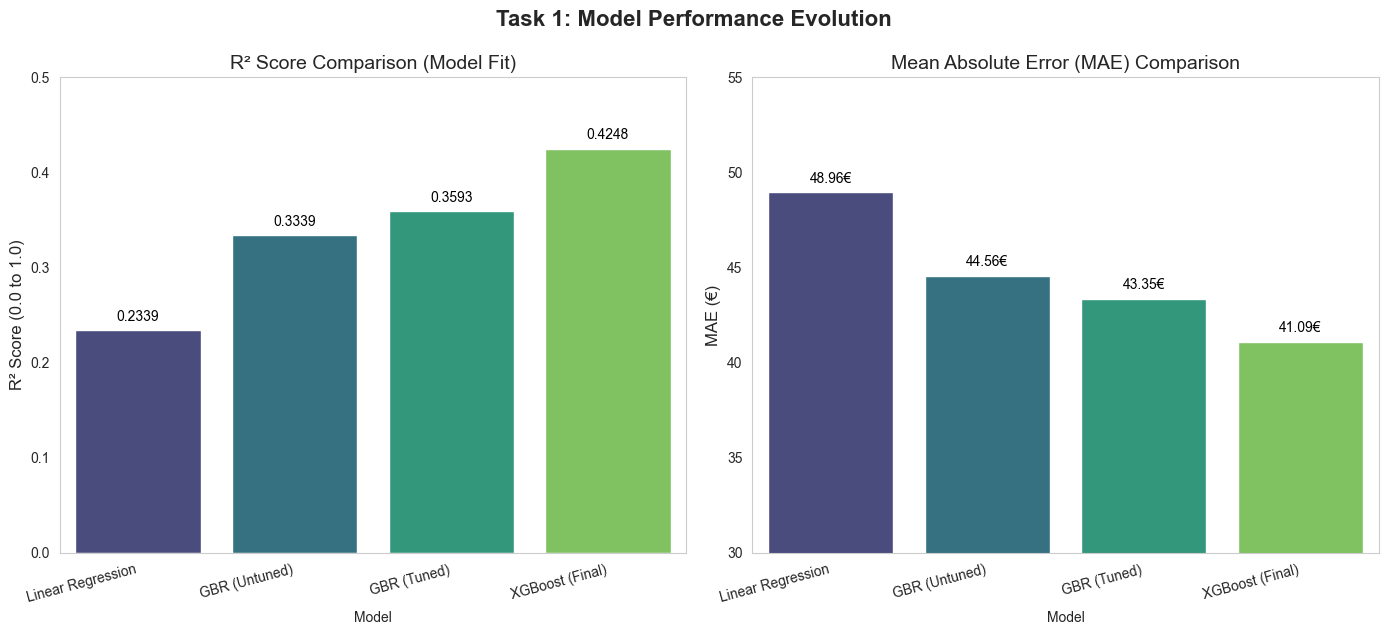

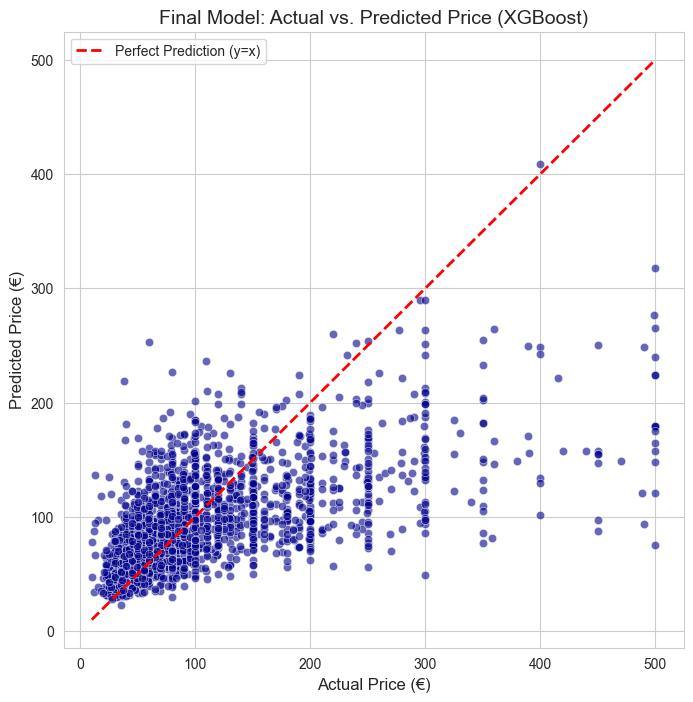


--- Final XGBoost Model Metrics (Recalculated from CSV) ---
R2 Score: 0.3464
MAE: 41.09€


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error

# --- 1. Load Data ---
# Ensure this file exists in the same directory as your notebook!
try:
    results_df = pd.read_csv('task1_price_predictions.csv')
    y_test_final = results_df['Actual_Price']
    y_pred_final = results_df['Predicted_Price']
except FileNotFoundError:
    print("ERROR: 'task1_price_predictions.csv' not found.")
    print("Please run the export step (Step 3.14) first to create the file.")
    exit()

# --- 2. Data for Model Comparison Plot ---
# Using the final consolidated metrics from our sessions
model_metrics = {
    'Model': [
        'Linear Regression',
        'GBR (Untuned)',
        'GBR (Tuned)',
        'XGBoost (Final)'
    ],
    'R2_Score': [
        0.2339,  # LR (Untransformed R2)
        0.3339,  # GBR Untuned (Untransformed R2)
        0.3593,  # GBR Tuned (Untransformed R2)
        0.4248   # XGBoost Final (Log-Target R2)
    ],
    'MAE': [
        48.96,
        44.56,
        43.35,
        41.09
    ]
}
metrics_df = pd.DataFrame(model_metrics)

# --- 3. Plot 1: Model Performance Comparison ---
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Subplot 1: R2 Score
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R2_Score', data=metrics_df, palette="viridis")
plt.title('R² Score Comparison (Model Fit)', fontsize=14)
plt.ylabel('R² Score (0.0 to 1.0)', fontsize=12)
plt.ylim(0, 0.5)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y')
# Add R2 values on top of bars
for index, row in metrics_df.iterrows():
    plt.text(row.name, row.R2_Score + 0.01, f'{row.R2_Score:.4f}', color='black', ha="center", fontsize=10)


# Subplot 2: MAE
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='MAE', data=metrics_df, palette="viridis")
plt.title('Mean Absolute Error (MAE) Comparison', fontsize=14)
plt.ylabel('MAE (€)', fontsize=12)
plt.ylim(30, 55)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y')
# Add MAE values on top of bars
for index, row in metrics_df.iterrows():
    plt.text(row.name, row.MAE + 0.5, f'{row.MAE:.2f}€', color='black', ha="center", fontsize=10)


plt.tight_layout()
plt.suptitle('Task 1: Model Performance Evolution', y=1.05, fontsize=16, fontweight='bold')
plt.show()

# --- 4. Plot 2: Actual vs. Predicted Scatter Plot (Final Model) ---

plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

# Create a scatter plot of actual prices vs. predicted prices
sns.scatterplot(x=y_test_final, y=y_pred_final, alpha=0.6, color='darkblue')

# Plot the ideal prediction line (y=x)
max_val = max(y_test_final.max(), y_pred_final.max())
min_val = min(y_test_final.min(), y_pred_final.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction (y=x)')

plt.title('Final Model: Actual vs. Predicted Price (XGBoost)', fontsize=14)
plt.xlabel('Actual Price (€)', fontsize=12)
plt.ylabel('Predicted Price (€)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --- Summary of Final Model Performance (as a check) ---
print("\n--- Final XGBoost Model Metrics (Recalculated from CSV) ---")
print(f"R2 Score: {r2_score(y_test_final, y_pred_final):.4f}")
print(f"MAE: {mean_absolute_error(y_test_final, y_pred_final):.2f}€")